In [ ]:
"""Linear Regression - students """

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [4]:
dataset = pd.read_csv("1.2_data_Student Study Hour V2.csv")

print(dataset.shape)

(28, 2)


In [5]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
dataset.describe()

,Hours,Scores
count,28.000000,28.000000
mean,4.832143,49.964286
std,2.530562,25.041421
min,1.100000,17.000000
25%,2.675000,29.250000
50%,4.650000,44.500000
75%,7.025000,70.500000
max,9.200000,95.000000


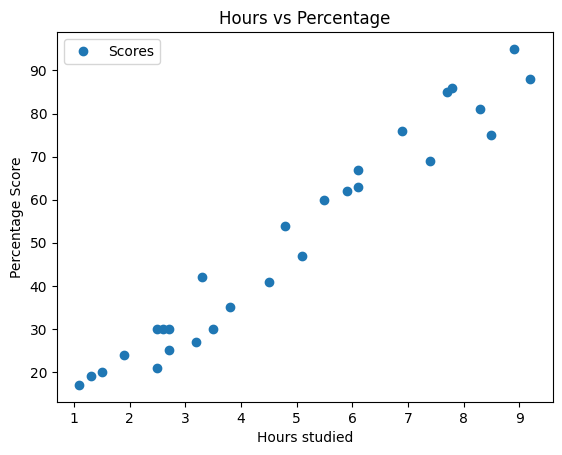

In [9]:
image = dataset.plot(x="Hours", y ="Scores", style="o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")

plt.show()

In [10]:
# Data preprocessing

x = dataset.iloc[:,:-1].values
y= dataset.iloc[:,1].values


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [13]:
# algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)


LinearRegression()

In [15]:
# retrieve the intercept and slope 
print(regressor.intercept_)
print(regressor.coef_) # for w and b for the equation: wx+b

3.051607645839603
[9.72743538]


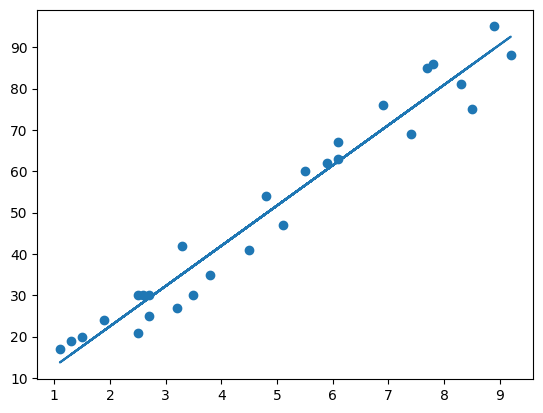

In [16]:
# plot the line of regression

line = regressor.coef_*x+regressor.intercept_

#plotting test data
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [17]:
# making predictions
print(x_test)
y_pred = regressor.predict(x_test)

[[3.2]
 [3.8]
 [1.1]
 [1.9]
 [1.5]
 [5.9]]


In [18]:
# comparing results with thhe predicted model results
df = pd.DataFrame({"Actual": y_test, "Predicted":y_pred})

print(df)

   Actual  Predicted
0      27  34.179401
1      35  40.015862
2      17  13.751787
3      24  21.533735
4      20  17.642761
5      62  60.443476


In [21]:
# What will be the predicted score if a student studies for 9.hours/day

hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)

own_pred= regressor.predict(test)

print("Number of hours= {}".format(hours))
print("Predicted score = {}".format(own_pred[0]))

Number of hours= 9.25
Predicted score = 93.03038494924621


In [22]:
# EVALUATION METRICS

from sklearn import metrics

print("Mean Absolute Error (MAE)=", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE)=", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE)", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error= 3.637250733700629
Mean Squared Error= 16.885894406848436
Root Mean Squared Error 4.109244992312875
